In [5]:
# Importing the data file

import pandas as pd
df=pd.read_csv("forestfires.csv")
df


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
# Dropping the month and day columns 

df.drop(columns= ["month","day"],inplace=True)
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [22]:
# Considering the small size as 0 and large size as 1

df.loc[df["size_category"]== "small","size_category"]=0
df.loc[df["size_category"]== "large","size_category"]=1
df["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [23]:
X =df.iloc[:,0:28]
Y =df.iloc[:,28]

In [29]:
# There are different data types due to which errors are rising so we are converting it into one data type

X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
Y_tensor = tf.convert_to_tensor(Y, dtype=tf.float32)


In [30]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [31]:
model = Sequential()
model.add(Dense(42, input_dim=28,  activation='relu')) #input layer
model.add(Dense(1, activation='sigmoid')) #output layer

In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history = model.fit(X_tensor,Y_tensor, validation_split=0.30, epochs=500, batch_size=200)

Epoch 1/500
2/2 [==============================] - 1s 149ms/step - loss: 6.9438 - accuracy: 0.7535 - val_loss: 11.9934 - val_accuracy: 0.6795
Epoch 2/500
2/2 [==============================] - 0s 29ms/step - loss: 5.5540 - accuracy: 0.7202 - val_loss: 9.7887 - val_accuracy: 0.6667
Epoch 3/500
2/2 [==============================] - 0s 20ms/step - loss: 4.2491 - accuracy: 0.7091 - val_loss: 7.6490 - val_accuracy: 0.6795
Epoch 4/500
2/2 [==============================] - 0s 19ms/step - loss: 3.1292 - accuracy: 0.6870 - val_loss: 5.6177 - val_accuracy: 0.6667
Epoch 5/500
2/2 [==============================] - 0s 31ms/step - loss: 2.3115 - accuracy: 0.6260 - val_loss: 4.0709 - val_accuracy: 0.6474
Epoch 6/500
2/2 [==============================] - 0s 28ms/step - loss: 2.2913 - accuracy: 0.4792 - val_loss: 3.5349 - val_accuracy: 0.6474
Epoch 7/500
2/2 [==============================] - 0s 21ms/step - loss: 2.6984 - accuracy: 0.4044 - val_loss: 3.4827 - val_accuracy: 0.6731
Epoch 8/500
2/2 [=

2/2 [==============================] - 0s 27ms/step - loss: 0.1924 - accuracy: 0.9418 - val_loss: 0.7153 - val_accuracy: 0.8397
Epoch 60/500
2/2 [==============================] - 0s 14ms/step - loss: 0.1857 - accuracy: 0.9418 - val_loss: 0.7587 - val_accuracy: 0.8397
Epoch 61/500
2/2 [==============================] - 0s 24ms/step - loss: 0.1832 - accuracy: 0.9307 - val_loss: 0.7587 - val_accuracy: 0.8333
Epoch 62/500
2/2 [==============================] - 0s 25ms/step - loss: 0.1812 - accuracy: 0.9335 - val_loss: 0.6916 - val_accuracy: 0.8397
Epoch 63/500
2/2 [==============================] - 0s 23ms/step - loss: 0.1777 - accuracy: 0.9418 - val_loss: 0.6533 - val_accuracy: 0.8397
Epoch 64/500
2/2 [==============================] - 0s 29ms/step - loss: 0.1721 - accuracy: 0.9418 - val_loss: 0.6803 - val_accuracy: 0.8397
Epoch 65/500
2/2 [==============================] - 0s 21ms/step - loss: 0.1722 - accuracy: 0.9363 - val_loss: 0.6804 - val_accuracy: 0.8397
Epoch 66/500
2/2 [========

2/2 [==============================] - 0s 31ms/step - loss: 0.0946 - accuracy: 0.9723 - val_loss: 0.2985 - val_accuracy: 0.8846
Epoch 118/500
2/2 [==============================] - 0s 26ms/step - loss: 0.0936 - accuracy: 0.9723 - val_loss: 0.2884 - val_accuracy: 0.8846
Epoch 119/500
2/2 [==============================] - 0s 26ms/step - loss: 0.0937 - accuracy: 0.9751 - val_loss: 0.2793 - val_accuracy: 0.8846
Epoch 120/500
2/2 [==============================] - 0s 24ms/step - loss: 0.0921 - accuracy: 0.9723 - val_loss: 0.2930 - val_accuracy: 0.8782
Epoch 121/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0949 - accuracy: 0.9723 - val_loss: 0.2991 - val_accuracy: 0.8782
Epoch 122/500
2/2 [==============================] - 0s 31ms/step - loss: 0.0913 - accuracy: 0.9723 - val_loss: 0.2600 - val_accuracy: 0.8910
Epoch 123/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0915 - accuracy: 0.9751 - val_loss: 0.2644 - val_accuracy: 0.8910
Epoch 124/500
2/2 [=

Epoch 175/500
2/2 [==============================] - 0s 32ms/step - loss: 0.0623 - accuracy: 0.9861 - val_loss: 0.2033 - val_accuracy: 0.9103
Epoch 176/500
2/2 [==============================] - 0s 26ms/step - loss: 0.0628 - accuracy: 0.9806 - val_loss: 0.1931 - val_accuracy: 0.9167
Epoch 177/500
2/2 [==============================] - 0s 23ms/step - loss: 0.0603 - accuracy: 0.9861 - val_loss: 0.1786 - val_accuracy: 0.9231
Epoch 178/500
2/2 [==============================] - 0s 29ms/step - loss: 0.0622 - accuracy: 0.9889 - val_loss: 0.1829 - val_accuracy: 0.9167
Epoch 179/500
2/2 [==============================] - 0s 32ms/step - loss: 0.0611 - accuracy: 0.9834 - val_loss: 0.1961 - val_accuracy: 0.9167
Epoch 180/500
2/2 [==============================] - 0s 33ms/step - loss: 0.0601 - accuracy: 0.9861 - val_loss: 0.1902 - val_accuracy: 0.9167
Epoch 181/500
2/2 [==============================] - 0s 28ms/step - loss: 0.0595 - accuracy: 0.9861 - val_loss: 0.1817 - val_accuracy: 0.9167
Epoch 

Epoch 233/500
2/2 [==============================] - 0s 26ms/step - loss: 0.0469 - accuracy: 0.9917 - val_loss: 0.1655 - val_accuracy: 0.9231
Epoch 234/500
2/2 [==============================] - 0s 27ms/step - loss: 0.0461 - accuracy: 0.9889 - val_loss: 0.1716 - val_accuracy: 0.9231
Epoch 235/500
2/2 [==============================] - 0s 27ms/step - loss: 0.0468 - accuracy: 0.9889 - val_loss: 0.1626 - val_accuracy: 0.9295
Epoch 236/500
2/2 [==============================] - 0s 25ms/step - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.1596 - val_accuracy: 0.9423
Epoch 237/500
2/2 [==============================] - 0s 35ms/step - loss: 0.0456 - accuracy: 0.9889 - val_loss: 0.1648 - val_accuracy: 0.9231
Epoch 238/500
2/2 [==============================] - 0s 30ms/step - loss: 0.0454 - accuracy: 0.9889 - val_loss: 0.1683 - val_accuracy: 0.9231
Epoch 239/500
2/2 [==============================] - 0s 36ms/step - loss: 0.0457 - accuracy: 0.9889 - val_loss: 0.1650 - val_accuracy: 0.9231
Epoch 

Epoch 291/500
2/2 [==============================] - 0s 28ms/step - loss: 0.0375 - accuracy: 0.9945 - val_loss: 0.1513 - val_accuracy: 0.9615
Epoch 292/500
2/2 [==============================] - 0s 30ms/step - loss: 0.0377 - accuracy: 0.9972 - val_loss: 0.1469 - val_accuracy: 0.9551
Epoch 293/500
2/2 [==============================] - 0s 28ms/step - loss: 0.0376 - accuracy: 0.9972 - val_loss: 0.1514 - val_accuracy: 0.9551
Epoch 294/500
2/2 [==============================] - 0s 26ms/step - loss: 0.0370 - accuracy: 0.9945 - val_loss: 0.1590 - val_accuracy: 0.9423
Epoch 295/500
2/2 [==============================] - 0s 33ms/step - loss: 0.0377 - accuracy: 0.9889 - val_loss: 0.1515 - val_accuracy: 0.9551
Epoch 296/500
2/2 [==============================] - 0s 28ms/step - loss: 0.0368 - accuracy: 0.9945 - val_loss: 0.1479 - val_accuracy: 0.9551
Epoch 297/500
2/2 [==============================] - 0s 31ms/step - loss: 0.0369 - accuracy: 0.9972 - val_loss: 0.1493 - val_accuracy: 0.9615
Epoch 

Epoch 349/500
2/2 [==============================] - 0s 23ms/step - loss: 0.0324 - accuracy: 0.9917 - val_loss: 0.1392 - val_accuracy: 0.9679
Epoch 350/500
2/2 [==============================] - 0s 33ms/step - loss: 0.0325 - accuracy: 0.9945 - val_loss: 0.1345 - val_accuracy: 0.9615
Epoch 351/500
2/2 [==============================] - 0s 34ms/step - loss: 0.0324 - accuracy: 0.9945 - val_loss: 0.1442 - val_accuracy: 0.9615
Epoch 352/500
2/2 [==============================] - 0s 28ms/step - loss: 0.0315 - accuracy: 0.9972 - val_loss: 0.1569 - val_accuracy: 0.9423
Epoch 353/500
2/2 [==============================] - 0s 34ms/step - loss: 0.0328 - accuracy: 0.9917 - val_loss: 0.1430 - val_accuracy: 0.9551
Epoch 354/500
2/2 [==============================] - 0s 35ms/step - loss: 0.0309 - accuracy: 0.9972 - val_loss: 0.1348 - val_accuracy: 0.9679
Epoch 355/500
2/2 [==============================] - 0s 31ms/step - loss: 0.0320 - accuracy: 0.9945 - val_loss: 0.1380 - val_accuracy: 0.9679
Epoch 

Epoch 407/500
2/2 [==============================] - 0s 31ms/step - loss: 0.0275 - accuracy: 0.9972 - val_loss: 0.1356 - val_accuracy: 0.9679
Epoch 408/500
2/2 [==============================] - 0s 31ms/step - loss: 0.0272 - accuracy: 0.9945 - val_loss: 0.1366 - val_accuracy: 0.9679
Epoch 409/500
2/2 [==============================] - 0s 31ms/step - loss: 0.0272 - accuracy: 0.9945 - val_loss: 0.1340 - val_accuracy: 0.9679
Epoch 410/500
2/2 [==============================] - 0s 32ms/step - loss: 0.0270 - accuracy: 0.9972 - val_loss: 0.1315 - val_accuracy: 0.9679
Epoch 411/500
2/2 [==============================] - 0s 44ms/step - loss: 0.0272 - accuracy: 0.9972 - val_loss: 0.1340 - val_accuracy: 0.9679
Epoch 412/500
2/2 [==============================] - 0s 25ms/step - loss: 0.0271 - accuracy: 0.9972 - val_loss: 0.1357 - val_accuracy: 0.9679
Epoch 413/500
2/2 [==============================] - 0s 31ms/step - loss: 0.0277 - accuracy: 0.9945 - val_loss: 0.1395 - val_accuracy: 0.9615
Epoch 

Epoch 465/500
2/2 [==============================] - 0s 26ms/step - loss: 0.0242 - accuracy: 0.9945 - val_loss: 0.1324 - val_accuracy: 0.9679
Epoch 466/500
2/2 [==============================] - 0s 19ms/step - loss: 0.0246 - accuracy: 0.9945 - val_loss: 0.1271 - val_accuracy: 0.9679
Epoch 467/500
2/2 [==============================] - 0s 32ms/step - loss: 0.0242 - accuracy: 0.9972 - val_loss: 0.1304 - val_accuracy: 0.9679
Epoch 468/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0241 - accuracy: 0.9972 - val_loss: 0.1357 - val_accuracy: 0.9615
Epoch 469/500
2/2 [==============================] - 0s 21ms/step - loss: 0.0242 - accuracy: 0.9945 - val_loss: 0.1305 - val_accuracy: 0.9679
Epoch 470/500
2/2 [==============================] - 0s 33ms/step - loss: 0.0238 - accuracy: 0.9972 - val_loss: 0.1281 - val_accuracy: 0.9679
Epoch 471/500
2/2 [==============================] - 0s 26ms/step - loss: 0.0239 - accuracy: 0.9972 - val_loss: 0.1297 - val_accuracy: 0.9679
Epoch 

In [34]:
# Metrics

scores = model.evaluate(X_tensor, Y_tensor)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.9865
accuracy: 98.65%


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

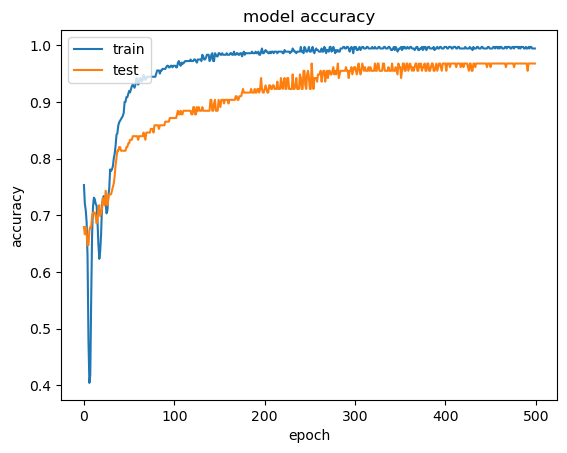

In [36]:
# Summarizing the history for accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()